In [4]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import time
from time import perf_counter

# Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.svm import SVC
#from sklearn import svm
#from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, learning_curve
%matplotlib inline

In [5]:
# Loading dataset
diabetes = pd.read_csv('data/diabetes_data_upload.csv')
obesity = pd.read_csv('data/ObesityDataSet_raw_and_data_sinthetic.csv')

# split features and labels
x = diabetes.drop('class', axis=1)
y = diabetes['class']

# encode features to integer
trans_columns = x.columns[x.dtypes == 'O']
enc = OrdinalEncoder()
enc.fit(x[trans_columns])
x[trans_columns] = enc.transform(x[trans_columns])

# encode labels to interger
le = LabelEncoder()
y = le.fit_transform(y)

# split train and test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=78)



In [38]:
nn = MLPClassifier(hidden_layer_sizes=(10), activation = 'relu', solver='adam', 
                    alpha=0.0001, max_iter=2000, validation_fraction=0.2, random_state=2)
time_start = perf_counter()
nn.fit(x_train, y_train)
fit_time = perf_counter() - time_start

y_train_pred = nn.predict(x_train)
y_train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train accuracy for {}: {}".format(nn, y_train_accuracy))

y_test_pred = nn.predict(x_test)
y_test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test accuracy for {}: {}".format(nn, y_test_accuracy))

print(f'Train: fit_time = {fit_time}')

Train accuracy for MLPClassifier(hidden_layer_sizes=10, max_iter=2000, random_state=42,
              validation_fraction=0.2): 0.9302884615384616
Test accuracy for MLPClassifier(hidden_layer_sizes=10, max_iter=2000, random_state=42,
              validation_fraction=0.2): 0.9519230769230769
Train: fit_time = 0.7724364999994577


In [39]:
np.random.seed(42)
nn_model_rhc = mlrose.NeuralNetwork(hidden_nodes=[10], activation='relu',
                                    algorithm='random_hill_climb', max_iters=2000,
                                    bias=True, is_classifier=True, learning_rate=0.1,
                                    early_stopping=True, clip_max=5, max_attempts=100,
                                    random_state=3)
nn_model_sa = mlrose.NeuralNetwork(hidden_nodes=[10], activation='relu',
                                   algorithm='simulated_annealing', max_iters=2000,
                                   bias=True, is_classifier=True, learning_rate=1,
                                   early_stopping=True, clip_max=5, max_attempts=100,
                                   random_state=3)
nn_model_ga = mlrose.NeuralNetwork(hidden_nodes=[10], activation='relu',
                                   algorithm='genetic_alg', max_iters=2000,
                                   bias=True, is_classifier=True, learning_rate=1,
                                   early_stopping=True, clip_max=5, max_attempts=100,
                                   random_state=3)

In [40]:
neural_nets = [nn_model_rhc, nn_model_sa, nn_model_ga]
train_acc = [y_train_accuracy]
test_acc = [y_test_accuracy]
train_time = [fit_time]
for nn in neural_nets:
    t = time.time()
    nn.fit(x_train, y_train)

    y_train_pred = nn.predict(x_train)
    y_train_accuracy = accuracy_score(y_train, y_train_pred)
    print("Train accuracy for {}: {}".format(nn, y_train_accuracy))
    train_acc.append(y_train_accuracy)

    y_test_pred = nn.predict(x_test)
    y_test_accuracy = accuracy_score(y_test, y_test_pred)
    print("Test accuracy for {}: {}".format(nn, y_test_accuracy))
    test_acc.append(y_test_accuracy)
    train_t = time.time()-t
    train_time.append(train_t)
    print("Time needed: {}".format(train_t))

Train accuracy for NeuralNetwork(clip_max=5, early_stopping=True, hidden_nodes=[10],
              max_iters=2000): 0.8918269230769231
Test accuracy for NeuralNetwork(clip_max=5, early_stopping=True, hidden_nodes=[10],
              max_iters=2000): 0.8942307692307693
Time needed: 3.1470675468444824
Train accuracy for NeuralNetwork(clip_max=5, early_stopping=True, hidden_nodes=[10],
              learning_rate=1, max_iters=2000): 0.9014423076923077
Test accuracy for NeuralNetwork(clip_max=5, early_stopping=True, hidden_nodes=[10],
              learning_rate=1, max_iters=2000): 0.8846153846153846
Time needed: 4.021530389785767
Train accuracy for NeuralNetwork(clip_max=5, early_stopping=True, hidden_nodes=[10],
              learning_rate=1, max_iters=2000): 0.375
Test accuracy for NeuralNetwork(clip_max=5, early_stopping=True, hidden_nodes=[10],
              learning_rate=1, max_iters=2000): 0.4230769230769231
Time needed: 61.38930583000183


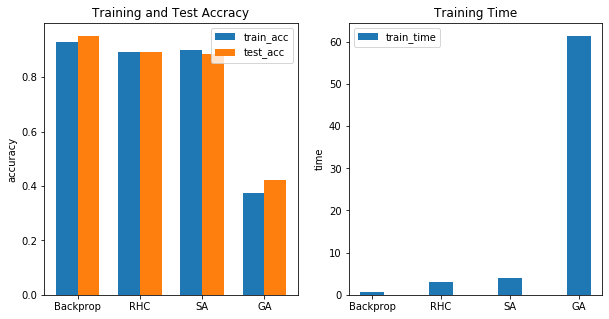

In [45]:
labels = ['Backprop', 'RHC', 'SA', 'GA']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

#fig, axs = plt.subplots()
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
rects1 = axs[0].bar(x - width/2, train_acc, width, label='train_acc')
rects2 = axs[0].bar(x + width/2, test_acc, width, label='test_acc')

# Add some text for labels, title and custom x-axis tick labels, etc.
axs[0].set_ylabel('accuracy')
axs[0].set_title('Training and Test Accracy')
axs[0].set_xticks(x)
axs[0].set_xticklabels(labels)
axs[0].legend()

# Add some text for labels, title and custom x-axis tick labels, etc.
rects3 = axs[1].bar(x, train_time, width, label='train_time')
axs[1].set_ylabel('time')
axs[1].set_title('Training Time')
axs[1].set_xticks(x)
axs[1].set_xticklabels(labels)
axs[1].legend()
plt.savefig('NN.jpg')